# Data Mining of Legacy Data

## Load Data and initial libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Load dataframe as a copy of the data, so as to avoid accidentally breaking the data
df = (pd.read_csv("./600092_data.csv")).copy()

## Cleaning

### Inspect the data

In [3]:
df

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
0,0.602437,218242,A-F,no,no,yes,no,no,78.0,20,NoRisk
1,0.602437,159284,TIA,no,no,no,no,no,70.0,60,NoRisk
2,0.602437,106066,A-F,no,yes,yes,no,no,95.0,40,Risk
3,0.128157,229592,TIA,no,no,yes,no,no,90.0,85,Risk
4,0.676862,245829,CVA,no,no,no,no,no,70.0,20,NoRisk
...,...,...,...,...,...,...,...,...,...,...,...
1515,0.391440,93406,A-F,no,yes,no,no,no,76.0,60,NoRisk
1516,0.253504,121814,A-F,no,no,yes,yes,no,90.0,75,Risk
1517,0.620373,101754,TIA,no,no,yes,no,no,75.0,20,NoRisk
1518,0.639342,263836,A-F,no,yes,no,no,no,70.0,45,NoRisk


Data Types are as follows:
- Random: Numeric, likely of little use as scikit has a shuffle feature. candidate for removing.
- Id: unique labels, redundant to the dataframes own id system, unless patient has had multiple sessions. How can we know which data to use if a patient has two different readings? Some may be the same. Will likely use to find duplicates. candidate to keep.
- Indication: nominal value, of medical importance. Should be converted to one-hot. candidate to keep.
- Diabetes: nominal value, of medical importance. keep.
- IHD: nominal value, of medical importance. keep.
- Hypertension: nominal value, of medical importance.  keep.
- Arrythmia: nominal value, of medical importance.  keep.
- History: nominal value, of medical importance.  keep.
- IPSI: Numeric value, should be kept, potentially turned into some ranges if we need something ordinal. keep the same for the time being.
- Contra: Numeric value, should be kept, potentially turned into some ranges if we need something ordinal. keep the same for the time being.
- Label: Very important for training. Keep.

## Next steps:
1. Search for duplicate entries
2. Search for null vals
3. Convert Indication to one-hot
4. Drop what is droppable.

# Clean

In [4]:
duplicates = df[df.duplicated(['Id'])]
print("All duplicate rows based on ID are:")
duplicates
#We can now potentially drop it

All duplicate rows based on ID are:


,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label


In [5]:
print("rows containing null values:")
df.isna().sum()

rows containing null values:


Random          0
Id              0
Indication      3
Diabetes        2
IHD             0
Hypertension    3
Arrhythmia      0
History         2
IPSI            4
Contra          0
label           3
dtype: int64

In [6]:
#(Code from: https://stackoverflow.com/a/44702024)
nans = lambda df: df[df.isnull().any(axis=1)]
nans(df)

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
201,0.388790,240232,CVA,yes,no,NaN,yes,no,95.0,90,Risk
337,0.617072,260770,CVA,no,yes,no,no,NaN,85.0,50,NoRisk
442,0.648122,261060,NaN,no,yes,yes,no,no,70.0,40,NoRisk
447,0.681744,224257,CVA,NaN,yes,yes,yes,no,90.0,100,Risk
514,0.392130,210861,A-F,NaN,no,yes,no,no,80.0,40,NoRisk
590,0.707950,289096,A-F,no,no,NaN,no,no,78.0,30,NoRisk
620,0.283872,227779,A-F,no,no,no,no,no,NaN,100,Risk
752,0.243518,146415,CVA,no,yes,yes,yes,no,NaN,100,Risk
784,0.243645,196483,CVA,no,no,yes,yes,NaN,95.0,100,Risk
812,0.756938,190671,CVA,no,yes,yes,no,no,76.0,50,NaN


No rows seem dirty enough to drop at this point (i.e. nothing contains multiple nans, I will plot each row as a histogram, and see if any can be imputed simply (via mean or modal vals)

#### Investigating NaNs

([array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
  array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
  array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]),
  array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0.

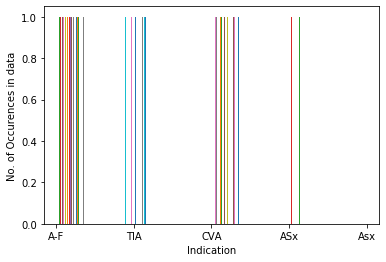

In [7]:
plt.xlabel('Indication')
plt.ylabel('No. of Occurences in data')
plt.hist(x = df['Indication'].dropna(), align = 'mid')
# Ok we have just uncovered another problem! asx is sometimes labeled as Asx and othertimes as ASx.
# Aditionally, I dont feel comfortable imputing the average value, as its lead is not high enough.
# Will drop nans for now, then impute at a later stage.

In [8]:
# So we can see the number of Asx vs ASx
Ser_ind = df["Indication"]
Ser_ind.value_counts()

A-F    493
CVA    416
TIA    390
ASx    186
Asx     32
Name: Indication, dtype: int64

In [9]:
df.replace(to_replace = "Asx", value = "ASx", inplace = True)
# So we can see the number of Asx vs ASx, and make sure its all adding up
Ser_ind = df["Indication"]
Ser_ind.value_counts()
#186 + 32 = 218. Checks out

A-F    493
CVA    416
TIA    390
ASx    218
Name: Indication, dtype: int64

In [10]:
IndicationNulls = df[df['Indication'].isnull()]
IndicationNulls
df.drop(labels= df[df['Indication'].isnull()].index, inplace=True)
df[df['Indication'].isnull()]

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label


([array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0.

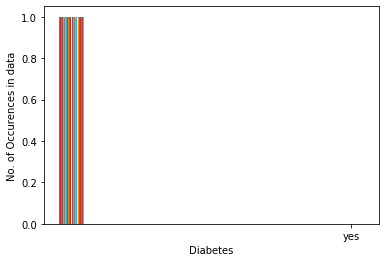

In [11]:
plt.xlabel('Diabetes')
plt.ylabel('No. of Occurences in data')
plt.hist(x = df['Diabetes'].dropna(), align = 'right')
# No has a major lead on Yes, so I can safely impute with a no.

In [12]:
def imputeVal(df,col,val,inplace):
    print("Value counts before:")
    print(df[col].value_counts(dropna=False))
    df[col].fillna(value = val, inplace = inplace)
    print("Value counts after:")
    print(df[col].value_counts(dropna=False))
imputeVal(df, 'Diabetes', 'no', True)

Value counts before:
no     1438
yes      77
NaN       2
Name: Diabetes, dtype: int64
Value counts after:
no     1440
yes      77
Name: Diabetes, dtype: int64


([array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([1., 0., 0., 0., 0., 0.

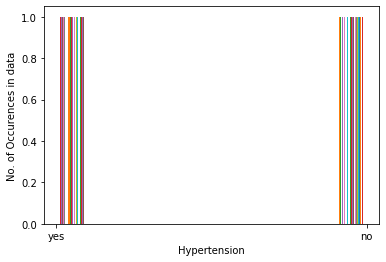

In [13]:
plt.xlabel('Hypertension')
plt.ylabel('No. of Occurences in data')
plt.hist(x = df['Hypertension'].dropna(), align = 'mid')
#Cannot simply impute, will remove and save for now

In [14]:
HypertensionNulls = df[df['Hypertension'].isnull()]
HypertensionNulls
df.drop(labels= df[df['Hypertension'].isnull()].index, inplace=True)
df[df['Hypertension'].isnull()]

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label


([array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0.

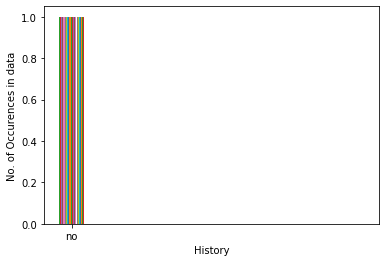

In [15]:
plt.xlabel('History')
plt.ylabel('No. of Occurences in data')
plt.hist(x = df['History'].dropna(), align = 'left')
# No has a major lead on Yes, so I can safely impute with a no.

In [16]:
imputeVal(df,'History','no',True)

Value counts before:
no     1489
yes      23
NaN       2
Name: History, dtype: int64
Value counts after:
no     1491
yes      23
Name: History, dtype: int64


([array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 1.

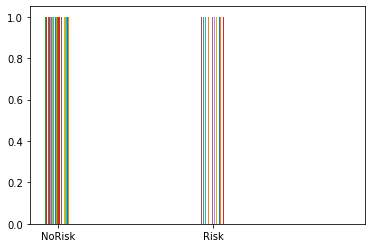

In [17]:
plt.hist(x = df['label'].dropna(), align = 'left')
# This is the most important label, needed for training the classifier(s). I will impute these at the end since this is what we are classifying for.

In [18]:
labelNulls = df[df['label'].isnull()]
labelNulls
df.drop(labels= df[df['label'].isnull()].index, inplace=True)
df[df['label'].isnull()]

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label


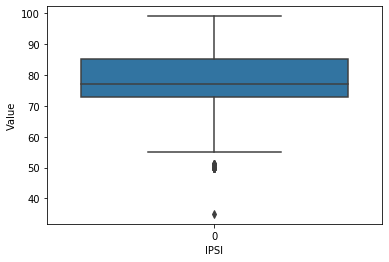

count    1507.000000
mean       78.850033
std        10.163475
min        35.000000
25%        73.000000
50%        77.000000
75%        85.000000
max        99.000000
Name: IPSI, dtype: float64

In [19]:
IPSI = df['IPSI']
IPSI
ax = sns.boxplot(data = IPSI)
ax.set(xlabel='IPSI', ylabel='Value')
plt.show()
IPSI.describe()
# Small IQR and low std, will save then impute with the mean for now

In [20]:
IPSINulls = df[df['IPSI'].isnull()]
IPSINulls
df.drop(labels= df[df['IPSI'].isnull()].index, inplace=True)
df[df['IPSI'].isnull()]

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label


In [21]:
#Did I miss anything?
df.isna().sum()

Random          0
Id              0
Indication      0
Diabetes        0
IHD             0
Hypertension    0
Arrhythmia      0
History         0
IPSI            0
Contra          0
label           0
dtype: int64

# Filter

## Steps:
1. Drop surplus features
    - Random
    - ID
2. Convert Indication to one-hot
3. Normalise Numeric features
4. Investigate Banding Numberic features

### Drop droppable cols

In [22]:
df = df.drop(axis = 1, labels = "Random")
df = df.drop(axis = 1, labels = "Id")

In [23]:
df

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
0,A-F,no,no,yes,no,no,78.0,20,NoRisk
1,TIA,no,no,no,no,no,70.0,60,NoRisk
2,A-F,no,yes,yes,no,no,95.0,40,Risk
3,TIA,no,no,yes,no,no,90.0,85,Risk
4,CVA,no,no,no,no,no,70.0,20,NoRisk
...,...,...,...,...,...,...,...,...,...
1515,A-F,no,yes,no,no,no,76.0,60,NoRisk
1516,A-F,no,no,yes,yes,no,90.0,75,Risk
1517,TIA,no,no,yes,no,no,75.0,20,NoRisk
1518,A-F,no,yes,no,no,no,70.0,45,NoRisk


# Feature Selection
- Variance, need to find a good threshhold
- Univariate Correlation, 
- Advanced, RELIEF-F, InfoGain/Mutual Information?
- Wrapper techniques?

In [24]:
df.var().sort_values(ascending = False)

IPSI    103.29622
dtype: float64

# Normalise


In [25]:
min = df['IPSI'].min()
max = df['IPSI'].max()
min_max_range = [min,max]
min_max_range

[35.0, 99.0]

In [26]:
min = df['Contra'].min()
max = df['Contra'].max()
min_max_range = [min,max]
min_max_range
#Do I see a null value?

[' ', '95']

### Going back to clean again

In [27]:
df['Contra'].sort_values()

453        
633      10
758     10 
90      10 
1052    10 
       ... 
92       95
1317     95
1117     95
1337     95
320      95
Name: Contra, Length: 1507, dtype: object

In [28]:
df.loc[453]

Indication         ASx
Diabetes            no
IHD                 no
Hypertension       yes
Arrhythmia          no
History             no
IPSI                70
Contra                
label           NoRisk
Name: 453, dtype: object

In [29]:
ContraNull = df.loc[453]
df.drop(axis = 0, index = 453, inplace = True)

In [30]:
df['IPSI'].sort_values()
# Am now going to go back and look for more ' ' vals

400     35.0
392     50.0
949     50.0
1471    50.0
418     50.0
        ... 
252     99.0
1074    99.0
811     99.0
785     99.0
1368    99.0
Name: IPSI, Length: 1506, dtype: float64

In [31]:
for col in df.columns:
    print(col,":",df[col].unique())
# Good thing I did this
    #no blank spaces, but if risk is unknown then we should remove those from the dataset too.



Indication : ['A-F' 'TIA' 'CVA' 'ASx']
Diabetes : ['no' 'yes']
IHD : ['no' 'yes']
Hypertension : ['yes' 'no']
Arrhythmia : ['no' 'yes']
History : ['no' 'yes']
IPSI : [78. 70. 95. 90. 75. 81. 80. 76. 82. 85. 68. 50. 73. 99. 71. 65. 74. 98.
 97. 60. 67. 79. 77. 84. 55. 35. 51. 69. 72.]
Contra : ['20 ' '60 ' '40' '85' '95' '100' '50' '50 ' '30 ' '40 ' '80' '25 ' '75 '
 '10 ' '70 ' '15 ' '75' '35 ' '30' '80 ' '55 ' '100 ' '90' '85 ' '79'
 '45 ' '65 ' '90 ' '62' '53' '51 ' '70' '60' '35' '55' '16 ' '73 ' '10'
 '65']
label : ['NoRisk' 'Risk' 'Unknown']


In [32]:
df['label'].unique()
labelUnknown = df.loc[df['label'] == 'Unknown']
labelUnknown
df
df.drop(axis = 'rows', index=[475,523], inplace = True)
#unknowns done

### Back to transforming

In [33]:
#reduce to ints since they're not actually using their decimal places
df = df.astype(dtype={'Contra':int,'IPSI':int})

# Since the outliers aren't too far away, I can safely use minmax
#(Based on this code: https://stackoverflow.com/a/41532180 )
from sklearn.preprocessing import normalize
def normalise_col(col):
    return (col-col.min())/(col.max()-col.min())
df['Contra'] = normalise_col(df['Contra'])
df['IPSI'] = normalise_col(df['IPSI'])
df

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
0,A-F,no,no,yes,no,no,0.671875,0.111111,NoRisk
1,TIA,no,no,no,no,no,0.546875,0.555556,NoRisk
2,A-F,no,yes,yes,no,no,0.937500,0.333333,Risk
3,TIA,no,no,yes,no,no,0.859375,0.833333,Risk
4,CVA,no,no,no,no,no,0.546875,0.111111,NoRisk
...,...,...,...,...,...,...,...,...,...
1515,A-F,no,yes,no,no,no,0.640625,0.555556,NoRisk
1516,A-F,no,no,yes,yes,no,0.859375,0.722222,Risk
1517,TIA,no,no,yes,no,no,0.625000,0.111111,NoRisk
1518,A-F,no,yes,no,no,no,0.546875,0.388889,NoRisk


In [34]:
yesNoDict = {'no':0,'yes':1}
riskNoRiskDict ={'NoRisk':0,'Risk':1}

df.replace(to_replace=yesNoDict, inplace = True)
df.replace(to_replace=riskNoRiskDict, inplace = True)



In [35]:

df = pd.get_dummies(data=df, columns=['Indication'])

In [36]:
df

,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label,Indication_A-F,Indication_ASx,Indication_CVA,Indication_TIA
0,0,0,1,0,0,0.671875,0.111111,0,1,0,0,0
1,0,0,0,0,0,0.546875,0.555556,0,0,0,0,1
2,0,1,1,0,0,0.937500,0.333333,1,1,0,0,0
3,0,0,1,0,0,0.859375,0.833333,1,0,0,0,1
4,0,0,0,0,0,0.546875,0.111111,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1515,0,1,0,0,0,0.640625,0.555556,0,1,0,0,0
1516,0,0,1,1,0,0.859375,0.722222,1,1,0,0,0
1517,0,0,1,0,0,0.625000,0.111111,0,0,0,0,1
1518,0,1,0,0,0,0.546875,0.388889,0,1,0,0,0


In [37]:
df.var().sort_values(ascending = False)

Hypertension      0.249867
IHD               0.249493
label             0.222518
Indication_A-F    0.219800
Indication_CVA    0.198424
Indication_TIA    0.191553
Arrhythmia        0.169508
Indication_ASx    0.123073
Contra            0.107669
Diabetes          0.047412
IPSI              0.025201
History           0.014423
dtype: float64

# Classifying
Before I start removing features, I want to see how well we can get a model to perform on the data at this point.

## Create Train Test Split

In [38]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df,test_size=0.3, train_size = 0.7, shuffle=True)
train_y = train['label']
train_x = train.drop('label', axis=1)
test_y = test['label']
test_x = test.drop('label', axis=1)

## Decision Tree Classifier

In [39]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X=train_x, y=train_y)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(679.5642857142857, 1037.7818181818182, 'Arrhythmia <= 0.5\ngini = 0.44\nsamples = 1052\nvalue = [708, 344]'),
 Text(402.5571428571429, 938.9454545454546, 'Contra <= 0.567\ngini = 0.263\nsamples = 830\nvalue = [701, 129]'),
 Text(175.37142857142857, 840.1090909090909, 'label <= 0.5\ngini = 0.077\nsamples = 602\nvalue = [578, 24]'),
 Text(63.77142857142857, 741.2727272727273, 'Indication_A-F <= 0.5\ngini = 0.01\nsamples = 396\nvalue = [394, 2]'),
 Text(31.885714285714286, 642.4363636363637, 'gini = 0.0\nsamples = 335\nvalue = [335, 0]'),
 Text(95.65714285714286, 642.4363636363637, 'IHD <= 0.5\ngini = 0.063\nsamples = 61\nvalue = [59, 2]'),
 Text(63.77142857142857, 543.6, 'gini = 0.0\nsamples = 45\nvalue = [45, 0]'),
 Text(127.54285714285714, 543.6, 'IPSI <= 0.859\ngini = 0.219\nsamples = 16\nvalue = [14, 2]'),
 Text(95.65714285714286, 444.76363636363635, 'Contra <= 0.333\ngini = 0.124\nsamples = 15\nvalue = [14, 1]'),
 Text(63.77142857142857, 345.9272727272727, 'gini = 0.0\nsamples

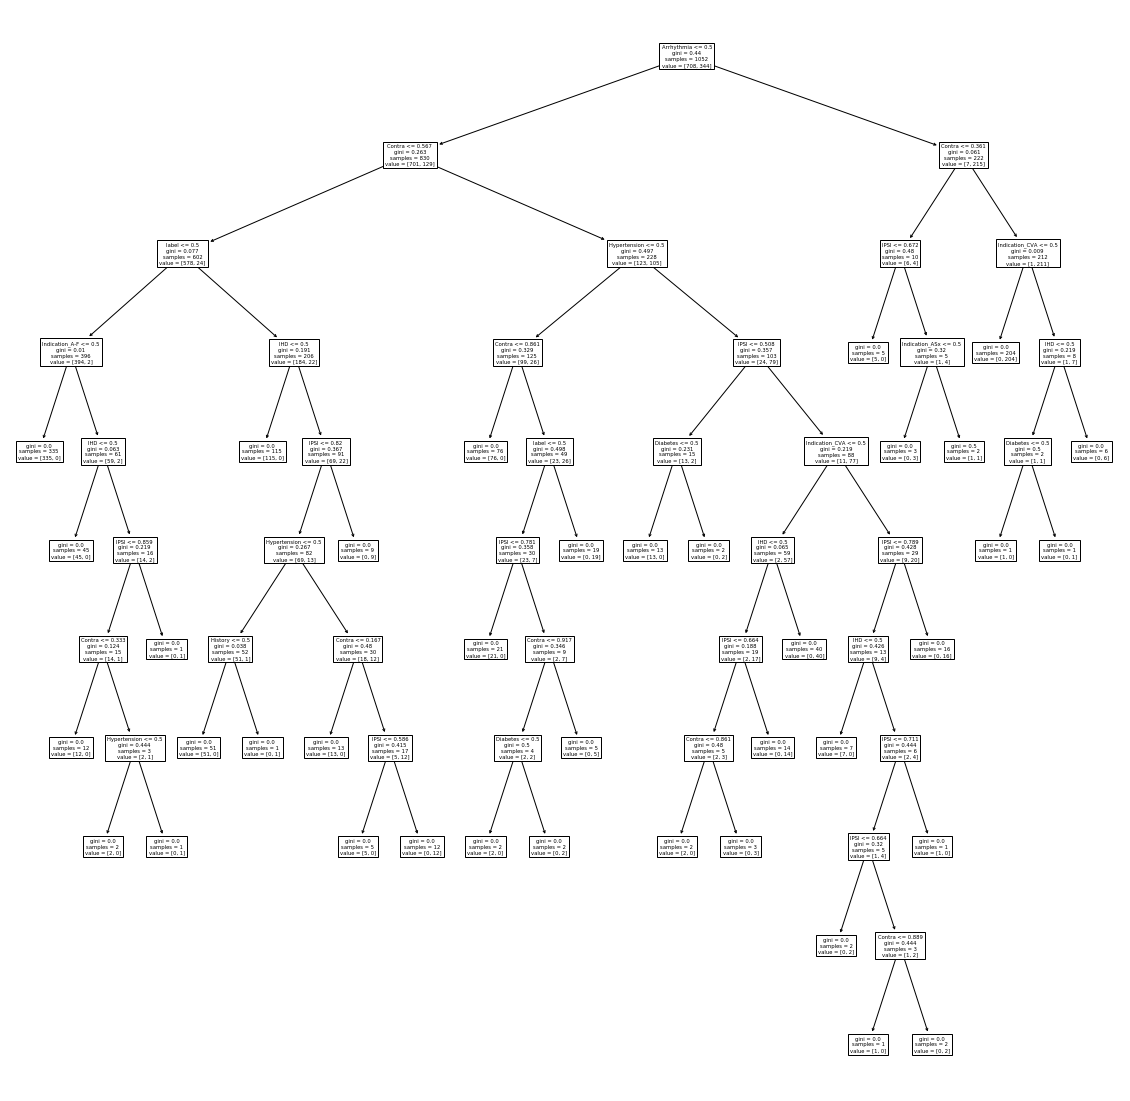

In [40]:
from sklearn.tree import plot_tree

plt.rcParams["figure.figsize"] = (20,20)

plot_tree( model, feature_names=df.columns)

In [41]:
pred_y = model.predict(test_x)

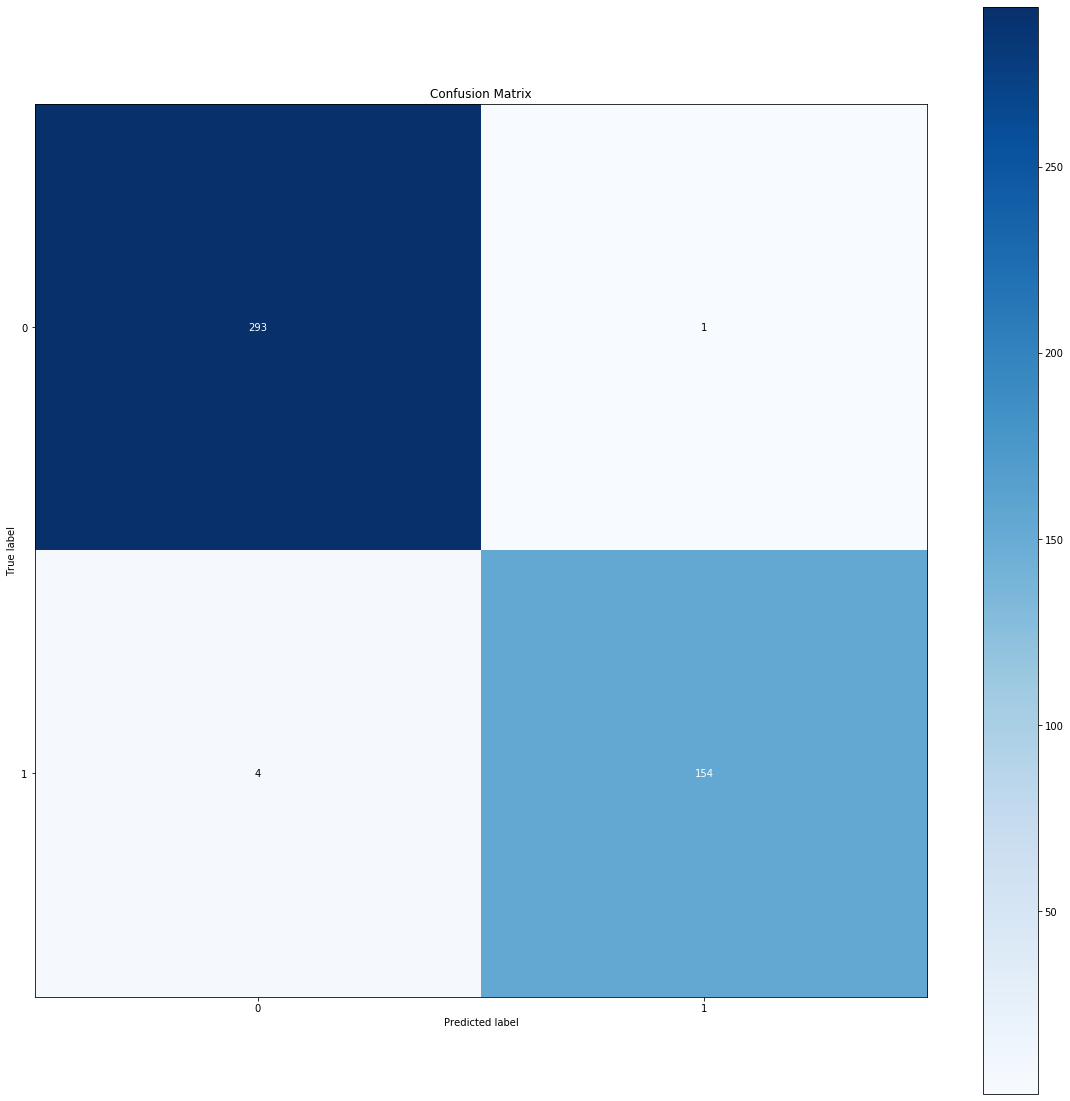

In [42]:
from scikitplot.metrics import plot_confusion_matrix 
baseline_mtx = plot_confusion_matrix(test_y, pred_y)
baseline_mtx

In [43]:
from sklearn.metrics import classification_report
target_names = ['No Risk', 'Risk']
baseline_report = classification_report(test_y, pred_y, target_names=target_names)
print(baseline_report)

              precision    recall  f1-score   support

     No Risk       0.99      1.00      0.99       294
        Risk       0.99      0.97      0.98       158

    accuracy                           0.99       452
   macro avg       0.99      0.99      0.99       452
weighted avg       0.99      0.99      0.99       452



In [44]:
from sklearn.metrics import accuracy_score
baseline_score = accuracy_score(y_true=test_y,y_pred = pred_y)
def getMAE(model,train_y,train_x,pred_y, test_y):
        from sklearn.metrics import mean_absolute_error
        TrAbsl = mean_absolute_error(train_y, model.predict(train_x))
        TeAbsl = mean_absolute_error(test_y, pred_y)
        print("Absoloute error (Training):", TrAbsl ,"\n", "Absoloute error (Testing):", TeAbsl)
        
def getMSE(reg_model,train_y,train_x,pred_y,test_y):
    from sklearn.metrics import mean_squared_error
    TrSqr = mean_squared_error(train_y, model.predict(train_x))
    TeSqr = mean_squared_error(test_y, pred_y)
    print("Squared error(Training):", TrSqr, "\n", "Squared error (Testing):", TeSqr)

baseline_MAE = getMAE(model,train_y, train_x, pred_y, test_y)    
baseline_MSE = getMSE(model,train_y, train_x, pred_y, test_y)    
baseline_score
#This is pretty good, but highlights a major class imbalance. What can be done though?

Absoloute error (Training): 0.0009505703422053232 
 Absoloute error (Testing): 0.011061946902654867
Squared error(Training): 0.0009505703422053232 
 Squared error (Testing): 0.011061946902654867


0.9889380530973452

# Class imbalance
- k fold cross validate
    - https://medium.com/lumiata/cross-validation-for-imbalanced-datasets-9d203ba47e8
    - stratified to keep it proportial
    - keep test set completely seperate still
- penalise false negatives

In [45]:
from sklearn.metrics import recall_score
class CrossValidation:
    def __init__(self, method, Shuffle,score, pred_y, true_y, model, k):
        self.method = method
        self.Shuffle = Shuffle
        self.score = score
        self.pred_y = pred_y
        self.true_y = true_y
        self.model = model
        self.k = str(k)
    def Results(self):
        print('k:' + self.k)
        print('Method:' + self.method)
        print('Shuffle:' + self.Shuffle)
        print('Sensitivity Score:' + str(self.score))
        print('\n')

def cv(method,k,x,y,shuffle):
    kf = method(n_splits=k, shuffle = shuffle)
    sensitivity_scores = []
    test_scores = []
    model = DecisionTreeClassifier()
    for train_index, test_index in kf.split(X=x,y=y):
        X_train, X_val = x.iloc[train_index], x.iloc[test_index]
        y_train, y_val = y.iloc[train_index], y.iloc[test_index]
        model.fit(X = X_train, y=y_train)
        pred_y = model.predict(X_val)
        validation_score = recall_score(y_true=y_val,y_pred = pred_y)
        sensitivity_scores.append(validation_score)
    return CrossValidation(str(method), str(shuffle),np.mean(sensitivity_scores),pred_y,y_val,model,k)

In [46]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
x = train_x
y = train_y
methods= [KFold, StratifiedKFold]
shuffs = [False, True]
results = []
best_model = None
k = range(2, 15)
for k in k:
    for meth in methods:
        for shuff in shuffs:
            cross_val = cv(meth,k,x,y,shuff)
            cross_val.Results()
            results.append(cross_val)

k:2
Method:<class 'sklearn.model_selection._split.KFold'>
Shuffle:False
Sensitivity Score:0.9432338865695957


k:2
Method:<class 'sklearn.model_selection._split.KFold'>
Shuffle:True
Sensitivity Score:0.962126642771804


k:2
Method:<class 'sklearn.model_selection._split.StratifiedKFold'>
Shuffle:False
Sensitivity Score:0.9476744186046512


k:2
Method:<class 'sklearn.model_selection._split.StratifiedKFold'>
Shuffle:True
Sensitivity Score:0.9651162790697674


k:3
Method:<class 'sklearn.model_selection._split.KFold'>
Shuffle:False
Sensitivity Score:0.9644573536933182


k:3
Method:<class 'sklearn.model_selection._split.KFold'>
Shuffle:True
Sensitivity Score:0.9654295531720422


k:3
Method:<class 'sklearn.model_selection._split.StratifiedKFold'>
Shuffle:False
Sensitivity Score:0.9476226798881262


k:3
Method:<class 'sklearn.model_selection._split.StratifiedKFold'>
Shuffle:True
Sensitivity Score:0.9650902618866005


k:4
Method:<class 'sklearn.model_selection._split.KFold'>
Shuffle:False
Sensi

In [47]:
best_score = 0
best_cv = None
for i in results:
    if i.score > best_score:
        best_score = i.score
        best_cv = i
best_cv.Results()

k:10
Method:<class 'sklearn.model_selection._split.StratifiedKFold'>
Shuffle:False
Sensitivity Score:0.985546218487395




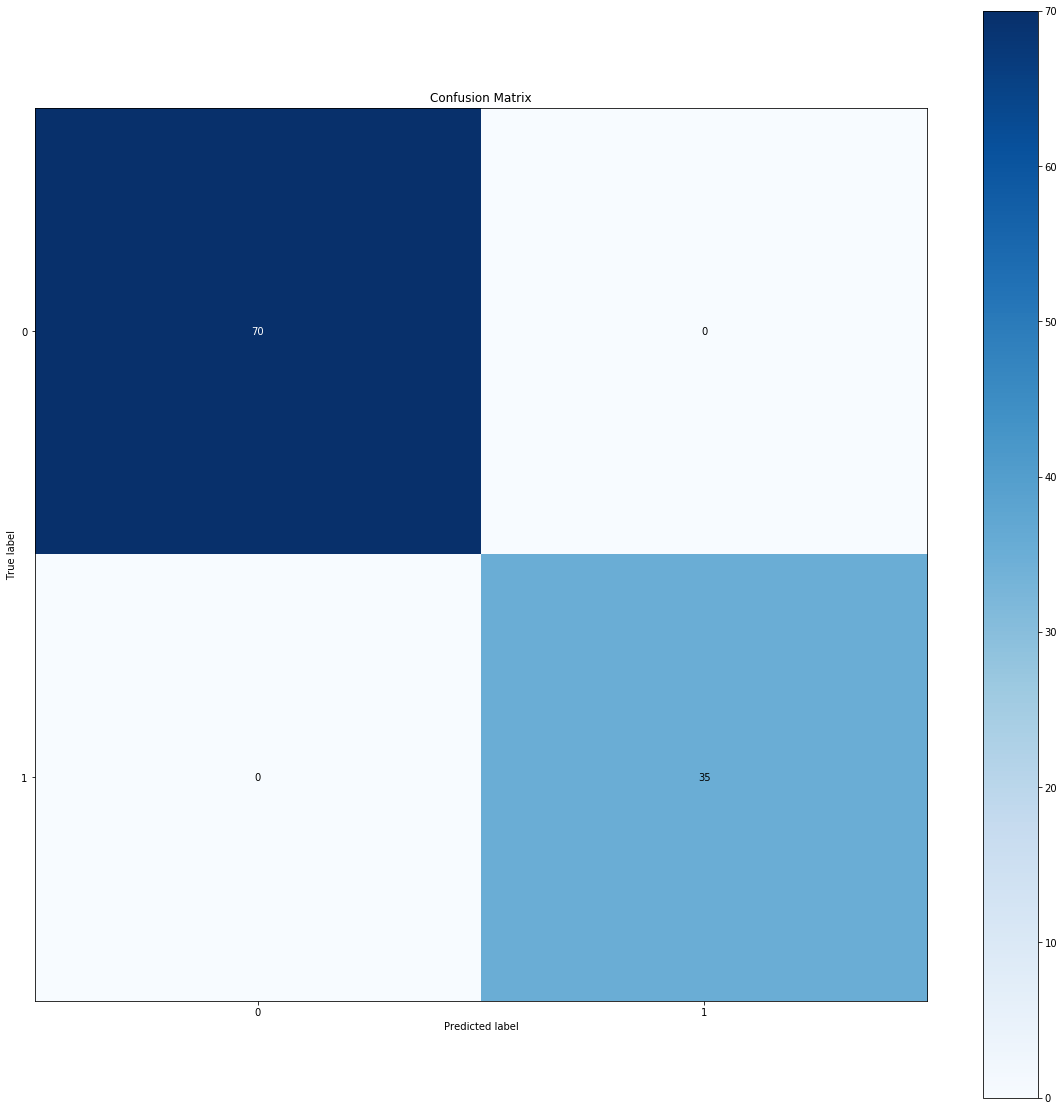

In [48]:
pred_y = best_cv.pred_y
y_true = best_cv.true_y
plot_confusion_matrix(y_true, pred_y)

How does it fit the test data?

In [49]:
model = best_cv.model
y_pred =  model.predict(test_x)
k_fold_report = classification_report(y_true = test_y, y_pred = y_pred)

In [50]:
#Most important is sensitivity, AKA recall of positive class
print('With K-fold')
print(k_fold_report)
print('Without K-fold')
print(baseline_report)

With K-fold
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       294
           1       0.99      0.99      0.99       158

    accuracy                           0.99       452
   macro avg       0.99      0.99      0.99       452
weighted avg       0.99      0.99      0.99       452

Without K-fold
              precision    recall  f1-score   support

     No Risk       0.99      1.00      0.99       294
        Risk       0.99      0.97      0.98       158

    accuracy                           0.99       452
   macro avg       0.99      0.99      0.99       452
weighted avg       0.99      0.99      0.99       452



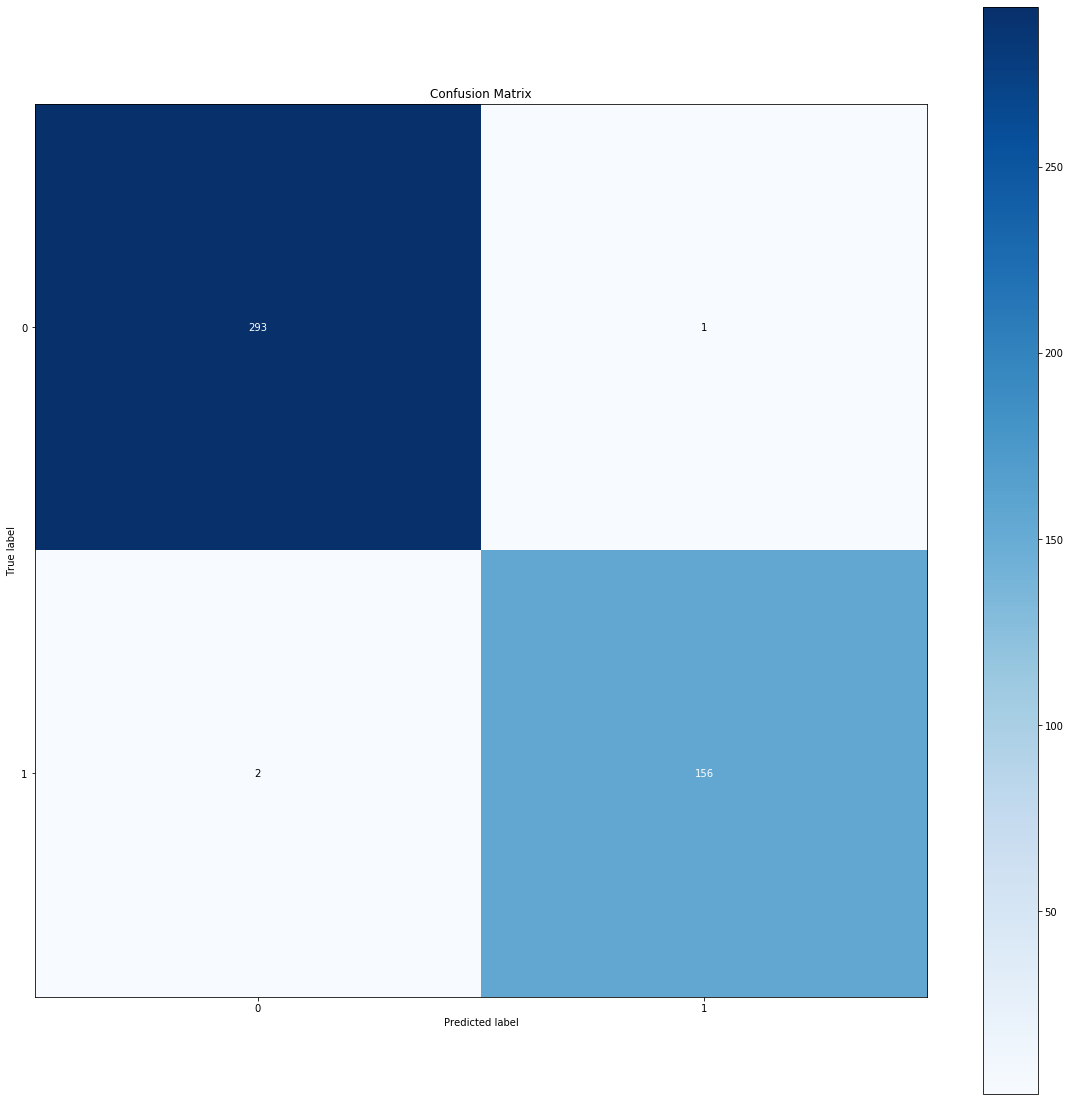

In [51]:
plot_confusion_matrix(y_true = test_y, y_pred = y_pred)

Doesn't really make a difference

False negatives are unnaceptable, need to reduce these or mitigate the risk
- possibly use a regression to create a score rather than a binary classification

## Weighting Classes

- Without k fold first

In [52]:
model = DecisionTreeClassifier(class_weight='balanced')
model.fit(train_x, train_y)
y_pred = model.predict(test_x)
weighted_balanced_sensitivity = recall_score(y_true = test_y, y_pred =y_pred)
weighted_balanced_sensitivity
weighted_balanced_report = classification_report(y_true = test_y, y_pred = y_pred)

In [53]:
print("Weighted")
print(weighted_balanced_report)
print("Unweighted")
print(baseline_report)

Weighted
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       294
           1       0.97      0.97      0.97       158

    accuracy                           0.98       452
   macro avg       0.98      0.98      0.98       452
weighted avg       0.98      0.98      0.98       452

Unweighted
              precision    recall  f1-score   support

     No Risk       0.99      1.00      0.99       294
        Risk       0.99      0.97      0.98       158

    accuracy                           0.99       452
   macro avg       0.99      0.99      0.99       452
weighted avg       0.99      0.99      0.99       452



## with k fold

In [54]:
kf = StratifiedKFold(n_splits=10,shuffle=True)
sensitivity_scores = []
best_sens = 0
best_model = None
test_scores = []
model = DecisionTreeClassifier(class_weight='balanced')
for train_index, test_index in kf.split(X=x,y=y):
    X_train, X_val = x.iloc[train_index], x.iloc[test_index]
    y_train, y_val = y.iloc[train_index], y.iloc[test_index]
    model.fit(X = X_train, y=y_train)
    pred_y = model.predict(X_val)
    validation_score = recall_score(y_true=y_val,y_pred = pred_y)
    sensitivity_scores.append(validation_score)
    if validation_score > best_sens:
        best_sens = validation_score
        best_model = model
weighted_balanced_k_fold_sensitivity = best_sens
y_pred = best_model.predict(test_x)
weighted_balanced_k_fold_report = classification_report(y_true = test_y, y_pred = y_pred)
weighted_balanced_k_fold_sensitivity

1.0

In [55]:
print("Weighted Validated")
print(weighted_balanced_k_fold_report)
print("Weighted Unvalidated")
print(weighted_balanced_report)
print("Validated")
print(k_fold_report)
print("Unweighted Unvalidated")
print(baseline_report)


Weighted Validated
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       294
           1       0.97      0.97      0.97       158

    accuracy                           0.98       452
   macro avg       0.98      0.98      0.98       452
weighted avg       0.98      0.98      0.98       452

Weighted Unvalidated
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       294
           1       0.97      0.97      0.97       158

    accuracy                           0.98       452
   macro avg       0.98      0.98      0.98       452
weighted avg       0.98      0.98      0.98       452

Validated
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       294
           1       0.99      0.99      0.99       158

    accuracy                           0.99       452
   macro avg       0.99      0.99      0.99       452
weighted avg       0.99 